# Clustering Toronto Neighborhoods  

[View notebook on NBViewer for visualizations](https://nbviewer.jupyter.org/github/YM88/clustering_neighborhoods/blob/master/clustering_toronto_neighborhoods.ipynb)

## Scraping wikipedia table to to get the postal codes of Canada: Toronto - Postal Codes of M

- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.  

- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.  
- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 

## Part 1

In [1]:
# importing libraries/etc
import requests 
import pandas as pd 
import numpy as np 
import random 

#!conda in
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# # libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html
import json
from pandas.io.json import json_normalize

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


import folium
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
# import matplotlib.cm as cm
# import matplotlib.colors as colors

In [2]:
result = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
if result.status_code == 200:
    print('YAY ¯\_(ツ)_/¯')
else:
    print('NAY')

YAY ¯\_(ツ)_/¯


In [3]:
source = result.text
soup = BeautifulSoup(source, 'lxml')

In [4]:
print(soup.title)
display_html(str(soup.table), raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal code,Borough,Neighborhood
M1A,Not assigned,
M2A,Not assigned,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Regent Park / Harbourfront
M6A,North York,Lawrence Manor / Lawrence Heights
M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
M8A,Not assigned,
M9A,Etobicoke,Islington Avenue
M1B,Scarborough,Malvern / Rouge


In [5]:
# pd.read_html(str(soup.table)) returns a list that the fist item is the dataframe
df = pd.read_html(str(soup.table))[0]

In [6]:
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.  

In [7]:
df = df[df.Borough != 'Not assigned']


- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.  

Seems the new table from wikipedia has already sorted this issue because I'm getting only unique rows equal to the length of the dataframe and no duplicates. I will replace forward slashes with comma.

In [8]:
print('# Unique Postal Codes:', df['Postal code'].nunique())
print('# duplicated postal codes:', df['Postal code'].duplicated().sum())

# Unique Postal Codes: 103
# duplicated postal codes: 0


In [9]:
# separating with a comma or replacing the space forward slash space with comma
df['Neighborhood'] = df.Neighborhood.str.replace(' / ', ', ')

In [10]:
df.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [11]:
# - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.  
df[df['Neighborhood'] == 'Not assigned']


,Postal code,Borough,Neighborhood


It seems no neighborhood is not assigned yet the following code will take care of the issue if it exists

In [12]:
df['Neighborhood'].where(df[df['Neighborhood'] == 'Not assigned'], df['Borough'], axis=0)

2                                              Parkwoods
3                                       Victoria Village
4                              Regent Park, Harbourfront
5                       Lawrence Manor, Lawrence Heights
6            Queen's Park, Ontario Provincial Government
                             ...                        
160        The Kingsway, Montgomery Road, Old Mill North
165                                 Church and Wellesley
168                Business reply mail Processing CentrE
169    Old Mill South, King's Mill Park, Sunnylea, Hu...
178    Mimico NW, The Queensway West, South of Bloor,...
Name: Neighborhood, Length: 103, dtype: object

In [13]:
df.shape

(103, 3)

In [14]:
df

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing CentrE
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


## Part 2  
In order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. Since google and other APIs has made payment requirement for location calls, I just imported a csv.


In [15]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')

In [16]:
lat_lon

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [17]:
df = df.merge(lat_lon, left_on='Postal code', right_on='Postal Code').drop('Postal code', axis=1)

## Part 3

Looking for Boroughs that only contain the word 'Toronto'

In [18]:
df_toronto = df[df['Borough'].str.contains('Toronto', regex=False)]

In [19]:
# 39 values
df_toronto.shape

(39, 5)

In [20]:
df_toronto

,Borough,Neighborhood,Postal Code,Latitude,Longitude
2,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",M7A,43.662301,-79.389494
9,Downtown Toronto,"Garden District, Ryerson",M5B,43.657162,-79.378937
15,Downtown Toronto,St. James Town,M5C,43.651494,-79.375418
19,East Toronto,The Beaches,M4E,43.676357,-79.293031
20,Downtown Toronto,Berczy Park,M5E,43.644771,-79.373306
24,Downtown Toronto,Central Bay Street,M5G,43.657952,-79.387383
25,Downtown Toronto,Christie,M6G,43.669542,-79.422564
30,Downtown Toronto,"Richmond, Adelaide, King",M5H,43.650571,-79.384568
31,West Toronto,"Dufferin, Dovercourt Village",M6H,43.669005,-79.442259


### Visualization

In [21]:

map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat, lng, borough, neighbourhood in zip(df_toronto['Latitude'],
                                            df_toronto['Longitude'],
                                            df_toronto['Borough'],
                                            df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
    
map_toronto

### K-Means Clustering - Based on Lat and Lon

In [22]:
X = df_toronto[['Latitude', 'Longitude']]

C:\Users\yasha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


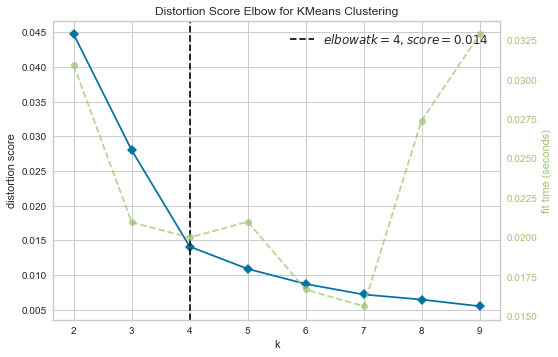

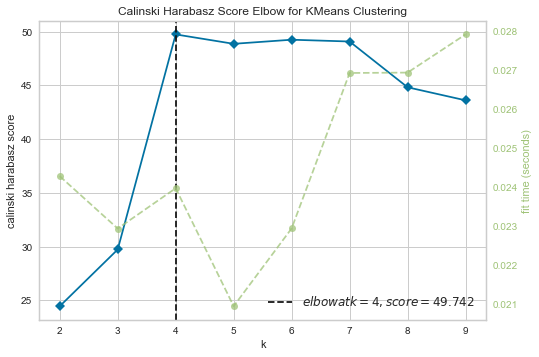

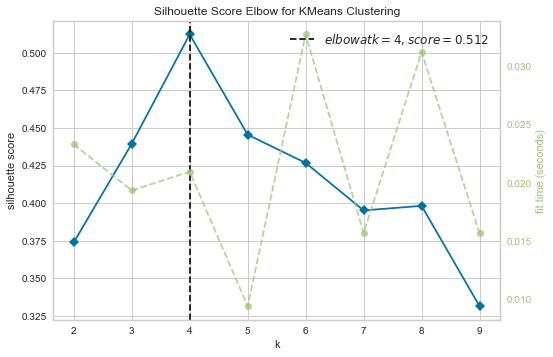

In [23]:
# Checking Clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
KElbowVisualizer(model, k=(2,10), metric='distortion').fit(X).show()
KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz').fit(X).show()
KElbowVisualizer(model, k=(2,10), metric='silhouette').fit(X).show();

Clustering Based on all metrics: 4 Clusters

In [24]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [25]:
df_toronto['clusters'] = kmeans.labels_

C:\Users\yasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_toronto

,Borough,Neighborhood,Postal Code,Latitude,Longitude,clusters
2,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636,0
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",M7A,43.662301,-79.389494,0
9,Downtown Toronto,"Garden District, Ryerson",M5B,43.657162,-79.378937,0
15,Downtown Toronto,St. James Town,M5C,43.651494,-79.375418,0
19,East Toronto,The Beaches,M4E,43.676357,-79.293031,1
20,Downtown Toronto,Berczy Park,M5E,43.644771,-79.373306,0
24,Downtown Toronto,Central Bay Street,M5G,43.657952,-79.387383,0
25,Downtown Toronto,Christie,M6G,43.669542,-79.422564,2
30,Downtown Toronto,"Richmond, Adelaide, King",M5H,43.650571,-79.384568,0
31,West Toronto,"Dufferin, Dovercourt Village",M6H,43.669005,-79.442259,2


In [27]:
import matplotlib.cm as cm
import matplotlib.colors as colors
k=4
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(df_toronto['Latitude'],
                                            df_toronto['Longitude'],
                                            df_toronto['Neighborhood'],
                                            df_toronto['clusters']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters